# Config

In [1]:
import os

**Change the content of the text in the path variable to store the path to the main folder**

In [2]:
path = '/mnt/storage/Documents/CentralePa/3A/Big Data and AI/DigitalClassification/'

In [3]:
os.chdir(path)
os.environ["Root_DIR"] = path

os.environ["Data_DIR"] = os.path.join(path,"Data")
os.environ["Data_Raw"] = os.path.join(os.environ["Data_DIR"],"Raw")
os.environ["Data_Processed"] = os.path.join(os.environ["Data_DIR"],"Processed")
os.environ["Data_Sample_Raw"] = os.path.join(os.environ["Data_DIR"],"Sample","Raw")
os.environ["Data_Sample_Processed"] = os.path.join(os.environ["Data_DIR"],"Sample","Processed")
os.environ["Data_Ref"] = os.path.join(os.environ["Data_DIR"],"Ref")

# Import File

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [5]:
file_name = "base_apprentissage.csv"
file_name_sample = "sample_base_apprentissage.csv"

In [6]:
df_full=pd.read_csv(os.path.join(os.environ["Data_Raw"],file_name))
df_sample=pd.read_csv(os.path.join(os.environ["Data_Sample_Raw"],
                                   file_name_sample))

# Preprocessing

In [7]:
from sources.preprocess import Preprocess
from sources.utils import json_file_dict

In [8]:
preprocess = Preprocess(df_full["commentaire_brut"])

In [9]:
json_sub_path = os.path.join(os.environ["Data_Ref"],"custom_lookup_table.json")
dict_sub = json_file_dict(json_sub_path)
preprocess.subsitution(dict_sub)

In [10]:
preprocess.clean_character()

In [11]:
exception_path = os.path.join(os.environ["Data_Ref"],"exceptions_lemmatization.json")
dict_exceptions = json_file_dict(exception_path)
list_exceptions = dict_exceptions["exceptions"].copy()

In [12]:
preprocess.clean_lemmatization(list_exceptions)

In [13]:
preprocess.series

0        merci rappeler client souhaite annuler tpe num contact     
1        prt                                                        
2        client souhaite passer offrir pro                          
3        demande travail numéro ot creation ok                      
4        info demengament                                           
               ...                                                  
10995    envoi mdp provisoire via csrtool compte compte compte      
10996    vers assistance aide espace client                         
10997    envoi code puk                                             
10998    info contrat envoyer mot passe provisoire voie postal      
10999    souhaite modif mot passe wifi service technique injoignable
Name: commentaire_brut, Length: 11000, dtype: object

In [16]:
df_full["comment_preprocessed"]=preprocess.series

## Save to pickle

In [21]:
file_name_sample_pickle = "learning_base_preprocessed.pkl"
newPath = os.path.join(os.environ["Data_Processed"],
                                   file_name_sample_pickle)
df_full.to_pickle(newPath)

## Load pickle

In [7]:
from sources.preprocess import Preprocess
from sources.utils import json_file_dict

file_name_sample_pickle = "learning_base_preprocessed.pkl"
newPath = os.path.join(os.environ["Data_Processed"],
                                   file_name_sample_pickle)
df_sample=pd.read_pickle(newPath)

# Improve cleaning

In [18]:
preprocess = Preprocess(df_full["comment_preprocessed"])

Can't remove mot from stopword list


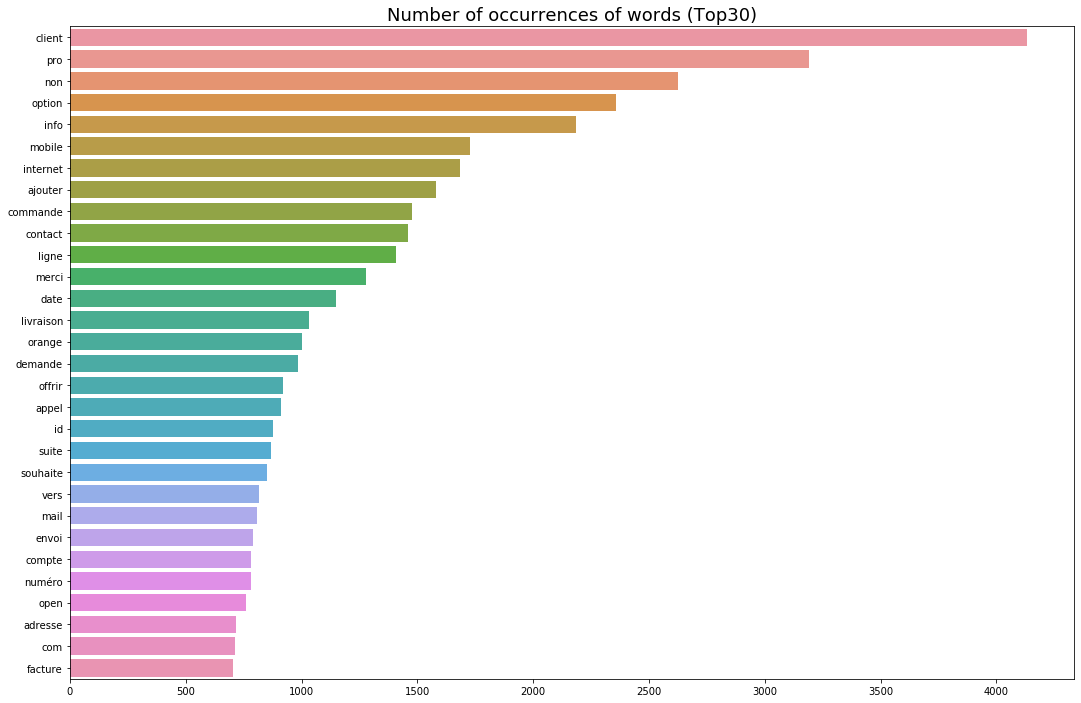

In [20]:
preprocess.plot_top_occur(30)

In [15]:
preprocess.display_unknow_word(df_sample, os.environ["Data_Ref"])

'reglement', 'reco']
--------
Element: 4276
Sentence: info sur offre détenue opo
unkown words: ['offrir', 'opo']
--------
Element: 4278
Sentence: ajouttv sur nd 0322536984 avec canal pro
unkown words: ['ajouttv', 'nd']
--------
Element: 4279
Sentence: client va passer en fibre via autre fai orange ne couvre pas la zone
unkown words: ['via', 'fai', 'couvrir']
--------
Element: 4280
Sentence: info sur resiliation
unkown words: ['resiliation']
--------
Element: 4281
Sentence: bonjour,####merci de remettre en place le service transfert d'appels sur la ligne : 0344263634 ####cordialement
unkown words: ['remettre', 'ligne']
--------
Element: 4284
Sentence: bonjour,####mme colette souhaite regrouper ses factures et bénéficier d'un tarif plus intéressant.####merci de migrer le client vers oopo intense en conservant les 2 postes actuels####ndi 0322905553##nds 0322905971##compte internet 210190082####mobile 0611713928 en intense##mobile 0640550988 en initial voix##la cliente souhaite une portabi

transf', 'fide'],
 680: ['sailly', 'sailly', 'laurette', 'ot'],
 682: ['dehan',
  'orpi',
  'immocenter',
  'gmail',
  'com',
  'parcko',
  'oop',
  'voip',
  'univers',
  'equilibre',
  'portabilite',
  'operateur',
  'univers',
  'equilibre',
  'portabilite',
  'operateur',
  'univers',
  'equilibre',
  'portabilite',
  'operateur',
  'cpte',
  'plp',
  'livebox',
  'diff',
  'adress',
  'install',
  'paiemt',
  'ot',
  'softisabl',
  'oop',
  'start',
  'perf',
  'vad',
  'iphone',
  'ligne',
  'equilibre',
  'vad'],
 683: ['cpi', 'envoyer'],
 684: ['numero', 'hotline', 'upr'],
 685: ['envoyer'],
 686: ['offrir',
  'abo',
  'order',
  'abo',
  'xdsl',
  'accès',
  'accès',
  'pô',
  'lamorlaye'],
 687: ['revenir', 'rio', 'afin'],
 688: ['order'],
 689: ['catherine'],
 690: ['ouvrir',
  'courir',
  'avre',
  'siret',
  'marcel',
  'thomas',
  'contoire',
  'hamel',
  'agir',
  'connaître',
  'offic',
  'lequel',
  'falloir',
  'chez',
  'dépendre'],
 691: ['ere', 'abonnemer', 'fr', '